In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [2]:
nifty = pd.read_csv('nifty.csv', index_col=0, parse_dates=True) #Get nifty prices
nifty.head()

,Close,Open,High,Low,Vol.,Change %
Date,,,,,,
2002-04-01,1138.95,1129.85,1143.30,1129.85,41.46M,0.83%
2003-04-01,984.30,977.40,992.05,973.50,50.07M,0.62%
2004-04-01,1819.65,1771.45,1823.05,1771.45,111.07M,2.69%
2005-04-01,2067.65,2035.90,2071.20,2024.25,63.21M,1.57%
2008-04-01,4739.55,4735.65,4800.75,4628.75,119.88M,0.11%


In [3]:
nifty.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4921 entries, 2002-04-01 to 2019-09-30
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     4921 non-null   float64
 1   Open      4921 non-null   float64
 2   High      4921 non-null   float64
 3   Low       4921 non-null   float64
 4   Vol.      4921 non-null   object 
 5   Change %  4921 non-null   object 
dtypes: float64(4), object(2)
memory usage: 269.1+ KB


<AxesSubplot:title={'center':'Excess returns'}, xlabel='Date'>

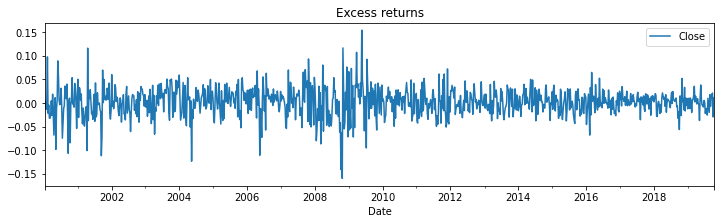

In [4]:
nifty_ret = nifty[['Close']].resample('W').last().pct_change().dropna() #Get weekly returns
nifty_ret.plot(title='Excess returns', figsize=(12, 3)) #Plot the dataset

In [5]:
nifty_ret.shape

(1032, 1)

In [6]:
adfuller(nifty_ret.dropna())

(-7.782369826000612,
 8.351316361741859e-12,
 13,
 1018,
 {'1%': -3.4367899468008916,
  '5%': -2.8643833180472744,
  '10%': -2.5682839089705536},
 -4253.970681322195)

- As we can see that the p value is less than the significant value i.e. 0.05 so Null hypothesis is rejected.

In [7]:
#Fit the model
mod_kns = sm.tsa.MarkovRegression(nifty_ret.dropna(), k_regimes=3, trend='n',switching_variance=True)
res_kns = mod_kns.fit()
res_kns.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1032
Model:               MarkovRegression   Log Likelihood                2261.799
Date:                Sun, 10 Jul 2022   AIC                          -4505.599
Time:                        19:37:41   BIC                          -4461.145
Sample:                    01-16-2000   HQIC                         -4488.729
                         - 10-20-2019                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0014      0.000      8.696      0.000       0.001       0.002
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0004   3.22e-05     12.314      0.000       0.000       0.000
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0039      0.001      4.011      0.000       0.002       0.006
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9685      0.013     75.929      0.000       0.943       0.993
p[1->0]        0.0147        nan        nan        nan         nan         nan
p[2->0]        0.0356      0.037      0.963      0.336      -0.037       0.108
p[0->1]        0.0267      0.011      2.396      0.017       0.005       0.048
p[1->1]        0.9853        nan        nan        nan         nan         nan
p[2->1]     2.541e-16        nan        nan        nan         nan         nan
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

- We can see for regime 0 we got 0.0014 and for regime 1 0.0004 and for regime 2 0.0039

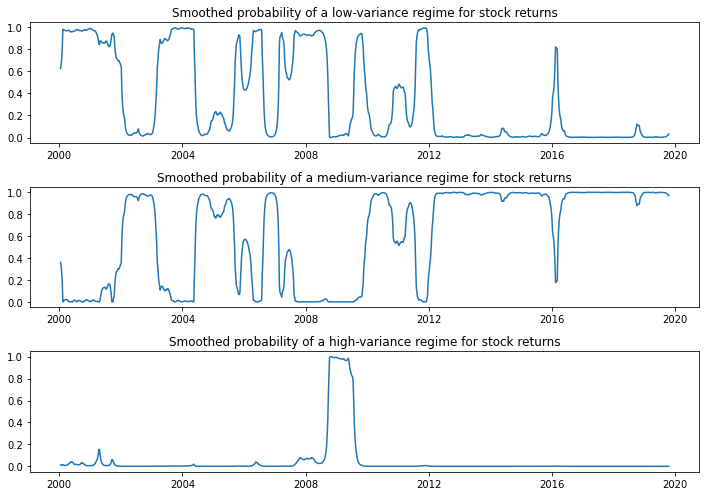

In [8]:
fig, axes = plt.subplots(3, figsize=(10,7))
ax = axes[0]
ax.plot(res_kns.smoothed_marginal_probabilities[0])
ax.set(title='Smoothed probability of a low-variance regime for stock returns')
ax = axes[1]
ax.plot(res_kns.smoothed_marginal_probabilities[1])
ax.set(title='Smoothed probability of a medium-variance regime for stock returns')
ax = axes[2]
ax.plot(res_kns.smoothed_marginal_probabilities[2])
ax.set(title='Smoothed probability of a high-variance regime for stock returns')
fig.tight_layout()

In [9]:
nifty.drop(['Vol.','Change %'],axis=1,inplace=True)


### Accuracy of MarkovRegression

In [10]:
nifty_c=nifty['Close']
nifty_c.to_csv('close.csv')
nifty_c=pd.read_csv('close.csv')
nifty_c

,Date,Close
0,2002-04-01,1138.95
1,2003-04-01,984.30
2,2004-04-01,1819.65
3,2005-04-01,2067.65
4,2008-04-01,4739.55
...,...,...
4916,2013-09-30,5735.30
4917,2014-09-30,7964.80
4918,2015-09-30,7948.90
4919,2016-09-30,8611.15


In [11]:
nifty_c.index = pd.to_datetime(nifty_c['Date'], format='%Y-%m-%d')
del nifty_c['Date']
nifty_c

,Close
Date,
2002-04-01,1138.95
2003-04-01,984.30
2004-04-01,1819.65
2005-04-01,2067.65
2008-04-01,4739.55
...,...
2013-09-30,5735.30
2014-09-30,7964.80
2015-09-30,7948.90


In [12]:
train = nifty_c[nifty_c.index < pd.to_datetime("2016-04-01", format='%Y-%m-%d')]
test = nifty_c[nifty_c.index > pd.to_datetime("2015-08-06", format='%Y-%m-%d')]

In [13]:
test=test.dropna()
test

,Close
Date,
2016-04-01,7713.05
2019-04-01,11669.15
2018-04-02,10211.80
2019-04-02,11713.20
2017-04-03,9237.85
...,...
2016-09-29,8591.25
2017-09-29,9788.60
2015-09-30,7948.90


In [14]:
y_pred=mod_kns.predict(test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [15]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test, y_pred)
print('MSE: %f' % mse)

MSE: 95425934.796819


A mean squared error of zero indicates perfect skill, or no error but by in this model we are getting much more or errors

In [16]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test, y_pred)
print('MAE: %f' % mae)

MAE: 9673.092975


A mean absolute error of zero indicates perfect skill, or no error but by in this model we are getting much more or errors

In [17]:
import numpy as np
rmse = np.sqrt(mean_squared_error(test, y_pred))
print("RMSE: ",rmse)

RMSE:  9768.619902361812


The RMSE is pretty high too

## ARIMA

In [18]:
from statsmodels.tsa.arima.model import ARIMA

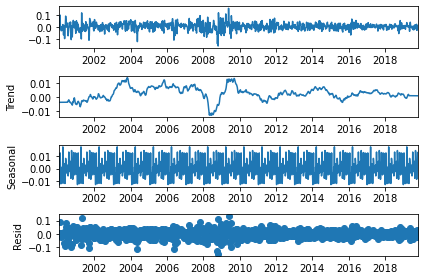

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(nifty_ret, model='additive',extrapolate_trend='freq')
result.plot()
plt.show()

In [22]:
def check_stationarity(ts):
    dftest = adfuller(nifty['Close'])
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')

In [23]:
seasonal = result.seasonal
check_stationarity(seasonal)

The series is stationary


c:\users\sayed\ml_path\env\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


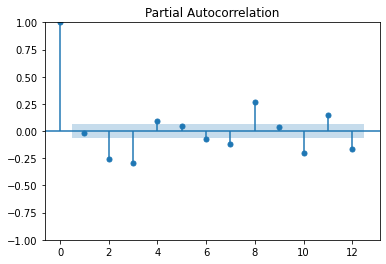

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(seasonal, lags =12)
plt.show()

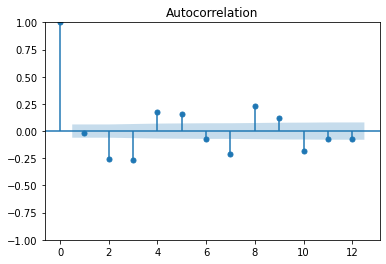

In [25]:
plot_acf(seasonal, lags =12)
plt.show()

By looking at the plot we can take Q as 1

In [197]:
ARIMAmodel = ARIMA(train, order = (1, 1, 0))
ARIMAmodel = ARIMAmodel.fit()

print(ARIMAmodel.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4048
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -36956.707
Date:                Sun, 10 Jul 2022   AIC                          73917.414
Time:                        21:36:46   BIC                          73930.025
Sample:                             0   HQIC                         73921.881
                               - 4048                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0849      0.025     -3.381      0.001      -0.134      -0.036
sigma2      5.006e+06   7.87e+04     63.627      0.000    4.85e+06    5.16e+06
Ljung-Box (L1) (Q):                   0.56   Jarque-

c:\users\sayed\ml_path\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\sayed\ml_path\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\sayed\ml_path\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\sayed\ml_path\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\sayed\ml_path\env

By looking at the model, we can say that the P-Value in ‘P>|z|’ column is highly significant as it is less than 0.05 

In [198]:
y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred

c:\users\sayed\ml_path\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [199]:
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df

,lower Close,upper Close
4048,3565.061625,12335.439428
4049,2006.082143,13894.189486
4050,760.669162,15139.621954
4051,-297.499696,16197.789156
4052,-1234.655218,17134.944819
...,...,...
5075,-121652.611998,137552.901588
5076,-121715.622996,137615.912586
5077,-121778.603388,137678.892978
5078,-121841.553219,137741.842810


In [200]:
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df

c:\users\sayed\ml_path\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,lower Close,upper Close,Predictions
4048,3565.061625,12335.439428,7950.250527
4049,2006.082143,13894.189486,7950.135814
4050,760.669162,15139.621954,7950.145558
4051,-297.499696,16197.789156,7950.144730
4052,-1234.655218,17134.944819,7950.144801
...,...,...,...
5075,-121652.611998,137552.901588,7950.144795
5076,-121715.622996,137615.912586,7950.144795
5077,-121778.603388,137678.892978,7950.144795
5078,-121841.553219,137741.842810,7950.144795


In [201]:
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

In [202]:
mse = mean_squared_error(test, y_pred_df['Predictions'])
print('MSE: %f' % mse)

MSE: 4825757.637813


In [203]:
mae = mean_absolute_error(test, y_pred_df['Predictions'])
print('MAE: %f' % mae)

MAE: 1811.076979


In [204]:
arma_rmse = np.sqrt(mean_squared_error(test, y_pred_df['Predictions']))
print("RMSE: ",arma_rmse)

RMSE:  2196.7607147373747


As compared to MarkovRegression we got much better model performance but still it is not that good as RMSE score is still high 

## SARIMA

In [88]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [117]:
SARIMAmodel = SARIMAX(train, order = (4, 1, 0),seasonal_order=(4,1,0,12))
SARIMAmodel = SARIMAmodel.fit()

print(SARIMAmodel.summary())

c:\users\sayed\ml_path\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\sayed\ml_path\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\sayed\ml_path\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\sayed\ml_path\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 4048
Model:             SARIMAX(4, 1, 0)x(4, 1, 0, 12)   Log Likelihood              -36696.709
Date:                            Sun, 10 Jul 2022   AIC                          73411.417
Time:                                    21:26:47   BIC                          73468.142
Sample:                                         0   HQIC                         73431.516
                                           - 4048                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3760      0.018    -21.157      0.000      -0.411      -0.341
ar.L2         -0.3467      0.022   

In [118]:
y_pred1 = SARIMAmodel.get_forecast(len(test.index))
y_pred1

c:\users\sayed\ml_path\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [119]:
y_preds_df = y_pred1.conf_int(alpha = 0.05) 
y_preds_df

,lower Close,upper Close
4048,3.806212e+03,1.275835e+04
4049,-4.271343e+02,1.012484e+04
4050,-1.977257e+03,9.220569e+03
4051,-1.665125e+03,1.026206e+04
4052,-1.203478e+03,1.116194e+04
...,...,...
5075,-1.747122e+06,1.904837e+06
5076,-1.749831e+06,1.907327e+06
5077,-1.751486e+06,1.910859e+06
5078,-1.752855e+06,1.914673e+06


In [120]:
y_preds_df["Predictions"] = SARIMAmodel.predict(start = y_preds_df.index[0], end = y_preds_df.index[-1])
y_preds_df

c:\users\sayed\ml_path\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,lower Close,upper Close,Predictions
4048,3.806212e+03,1.275835e+04,8282.281355
4049,-4.271343e+02,1.012484e+04,4848.853265
4050,-1.977257e+03,9.220569e+03,3621.656215
4051,-1.665125e+03,1.026206e+04,4298.465929
4052,-1.203478e+03,1.116194e+04,4979.231352
...,...,...,...
5075,-1.747122e+06,1.904837e+06,78857.542790
5076,-1.749831e+06,1.907327e+06,78748.307988
5077,-1.751486e+06,1.910859e+06,79686.847815
5078,-1.752855e+06,1.914673e+06,80908.990789


In [121]:
y_preds_df.index = test.index
y_preds_out = y_preds_df["Predictions"] 

In [122]:
mse = mean_squared_error(test, y_preds_df['Predictions'])
print('MSE: %f' % mse)

MSE: 1530648969.865753


In [123]:
mae = mean_absolute_error(test, y_preds_df['Predictions'])
print('MAE: %f' % mae)

MAE: 33076.464272


In [124]:
arma_rmse = np.sqrt(mean_squared_error(test, y_preds_df['Predictions']))
print("RMSE: ",arma_rmse)

RMSE:  39123.509171158876


Tried using SARIMA but still didnt got that any better result